In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [ ]:
#FFKLL FLAAR     KCESE     FF SAAA

In [2]:
datos=load_breast_cancer()

In [3]:
X=datos.data

In [4]:
y=datos.target

In [5]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
X=minmax.fit_transform(X)

In [19]:
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold
import numpy as np
from scipy.stats import mode
from sklearn.metrics import accuracy_score
K=10
skf=StratifiedKFold(n_splits=K)
resultados=pd.DataFrame(columns=["kmeans","aciertos entrena","aciertos test"])


In [20]:
for i,k in enumerate(range(2,10)):
    aciertos_entrena=0
    aciertos_test=0
    for train_index,test_index in skf.split(X,y):
         kmeans=KMeans(n_clusters=k)
         kmeans.fit(X[train_index],y[train_index])
         labels=kmeans.labels_
         y_train=y[train_index]
         array=np.zeros(k)
         for a in range(k):
              similares=(labels==a)
              argwhere=np.argwhere(similares)
              train_enc=y_train[argwhere]
              moda=mode(train_enc)[0]
              array[a]=moda
         y_pred_train=array[kmeans.predict(X[train_index])]
         y_pred_test=array[kmeans.predict(X[test_index])]
         aciertos_entrena+=accuracy_score(y[train_index],y_pred_train)
         aciertos_test+=accuracy_score(y[test_index],y_pred_test)
    resultados.loc[len(resultados)]=[k,aciertos_entrena/10,aciertos_test/10]
         
    

        

c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_3516\2345348302.py:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda=mode(train_enc)[0]
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` exp

In [21]:
resultados

,kmeans,aciertos entrena,aciertos test
0,2.0,0.927164,0.926222
1,3.0,0.901387,0.905138
2,4.0,0.908226,0.887500
3,5.0,0.926968,0.922713
4,6.0,0.889475,0.884054
5,7.0,0.910956,0.903415
6,8.0,0.919740,0.903415
7,9.0,0.923846,0.913910


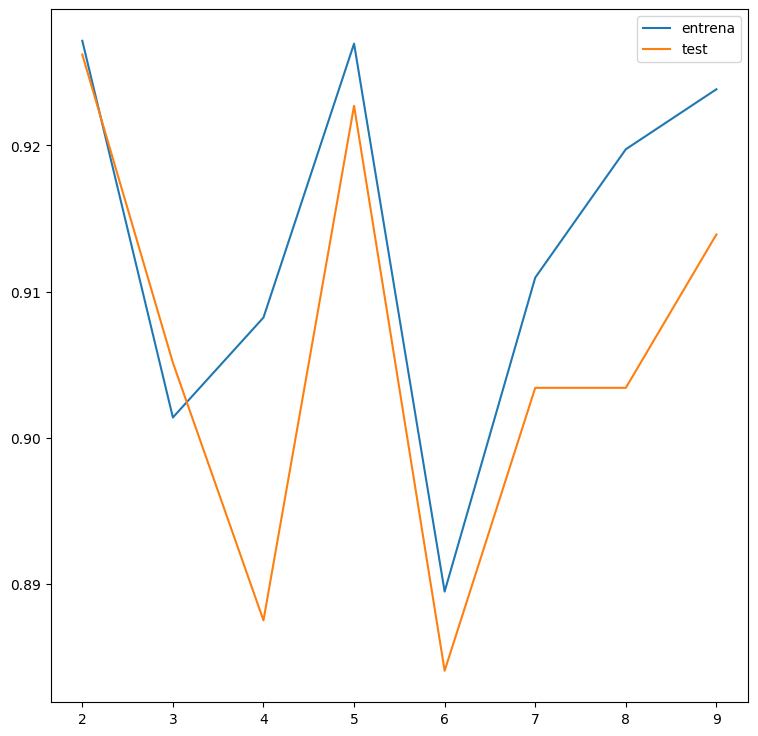

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
plt.plot(resultados["kmeans"],resultados["aciertos entrena"],label="entrena")
plt.plot(resultados["kmeans"],resultados["aciertos test"],label="test")
plt.legend()
plt.show()

In [24]:
#KCESE
optimo=resultados["aciertos test"].idxmax()

optimo=resultados.loc[optimo].kmeans
print(optimo)

2.0


In [25]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import cdist

In [27]:
kmeans=KMeans(n_clusters=int(optimo))
kmeans.fit(X,y)
centros=kmeans.cluster_centers_


c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
distancias=euclidean_distances(centros)

In [29]:
sigma=np.sum(distancias,axis=0)/centros.shape[0]-1

In [30]:
X_svm=np.exp(-cdist(X,centros)**2/(2*(sigma**2)))

In [32]:
from sklearn.svm import SVC

In [33]:
grados=pd.DataFrame(columns=["grado","aciertos test"])

In [37]:
for i,h in enumerate(range(2,5)):
    aciertos=np.zeros(10)
    k=0
    for train_index,test_index in skf.split(X,y):
        svm=SVC(degree=h,kernel="poly")
        svm.fit(X[train_index],y[train_index])
        aciertos[k]=svm.score(X[test_index],y[test_index])
        k+=1
    grados.loc[len(grados)]=[h,aciertos.mean()]



In [38]:
grados

,grado,aciertos test
0,2.0,0.980639
1,3.0,0.971867
2,4.0,0.968358
